In [3]:
from pygame.locals import *
import pygame
import random
import time
import itertools
from PIL import Image, ImageDraw

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
class Player:
    __id__ = 0
    __step__ = 8
    __spread__ = 8
    
    x = 0
    y = 0
    covid = 'N'
    covid_age = 0
 
    updateCountMax = 2
    updateCount = 0

    def __init__(self, id):
        random.seed()
        self.__id__ = id
        self.__step__ = random.randint(1, __STEP__) if random.randint(0, 100) > __STAY_HOME__ else 0
        self.__spread__ = random.randint(0, __STEP__) 
        self.x = random.randint(0, __fieldWidth__)
        self.y = __headerHeight__ + random.randint(0, __fieldHeight__)

    def update(self):
        random.seed()
        rnd = random.getrandbits(4)
        rnd_list.append(rnd)
        if rnd & 1 != 0 and (self.x < (__fieldWidth__ - (self.__step__ * 2))):
            self.x = self.x + self.__step__
        if rnd & 2 != 0 and (self.x > self.__step__ * 2):
            self.x = self.x - self.__step__
        if rnd & 4 != 0 and (self.y > __headerHeight__ + self.__step__ * 2):
            self.y = self.y - self.__step__
        if rnd & 8 != 0 and (self.y < (__fieldHeight__ - (self.__step__ * 2))):
            self.y = self.y + self.__step__
        if self.covid_age > 0:
            self.covid_age += 1
        if self.covid_age > __LATENCE__ and random.randint(0,10) > 4:
            self.covid = 'I'

    def draw(self, surface, image):
        surface.blit(image, (self.x,self.y)) 

In [5]:
class App:
    players = []
    __time__ = 0

    def __init__(self, population = 10):
        self.__time__ = 0
        self._running = True
        self._display_surf = None
        self._image_surf = None
        self._image_result = None
        self._canvas_ = None
        self.windowWidth = __fieldWidth__
        self.windowHeight = __fieldHeight__
        self.players = [Player(id) for id in range(population)] 
        for i in range(population, int(population * 1.01)):
            p = Player(i)          
            p.covid_age = 1
            p.covid = 'Y'
            p.__step__ = random.randint(1, __STEP__)
            self.players.append(p)

    def on_init(self):
        pygame.init()
        self._display_surf = pygame.display.set_mode((self.windowWidth,self.windowHeight), pygame.HWSURFACE)
        
        pygame.display.set_caption('Covid spread simulation')
        self._running = True
        self._image_map = pygame.image.load("map.png").convert()
        self._image_red = pygame.image.load("red.png").convert()
        self._image_green = pygame.image.load("green.png").convert()
        self._image_yellow = pygame.image.load("yellow.png").convert()
        self._image_result = pygame.Surface((__fieldWidth__, __headerHeight__), pygame.SRCALPHA)
        time.sleep (5.0);
 
    def on_event(self, event):
        if event.type == QUIT:
            self._running = False

    def on_loop(self):
        for p in self.players:
            p.update()
        pass
    
    def on_render(self):
        self._display_surf.fill((255,255,255))
        for p in self.players:
            if p.covid_age == 0:
                infects = [p for p in self.players if p.covid == 'Y']
                for i in infects:
                    distance = ((p.x - i.x)**2 + (p.y - i.y)**2)**0.5 
                    if distance < i.__spread__:
                        p.covid_age = 1
                        p.covid = 'Y'
            
            if p.covid == 'I':
                p.draw(self._display_surf, self._image_yellow)
            elif p.covid == 'Y':
                p.draw(self._display_surf, self._image_red)
            else:
                p.draw(self._display_surf, self._image_green)
               
        self._display_surf.blit(self._image_map, (0,0)) 
        if self.__time__ < __fieldWidth__:
            healthy = len([p for p in self.players if p.covid == 'N']) / __population__
            infected = len([p for p in self.players if p.covid == 'Y']) / __population__
            immune = len([p for p in self.players if p.covid == 'I']) / __population__

            pygame.draw.line(self._image_result, (0, 255, 0), (self.__time__, 0), (self.__time__, int(healthy * 100)), 1)
            pygame.draw.line(self._image_result, (255, 255, 0), (self.__time__, int(healthy * 100)), (self.__time__, int((immune+healthy) * 100)), 1)
            pygame.draw.line(self._image_result, (255, 0, 0), (self.__time__, int((immune+healthy) * 100)), (self.__time__, int((infected+healthy+immune) * 100)), 1)
        
        self._display_surf.blit(self._image_result, (0,0)) 
        
        pygame.display.flip()
        self.__time__ += 1
#         if self.__time__ > __fieldWidth__:
#             self._running = False
        
 
    def on_cleanup(self):
        pygame.quit()
 
    def on_execute(self):
        if self.on_init() == False:
            self._running = False
 
        while( self._running ):
            pygame.event.pump()
            keys = pygame.key.get_pressed() 
            if (keys[K_ESCAPE]):
                self._running = False
            self.on_loop()
            self.on_render()
            time.sleep (20.0 / 1000.0);
        self.on_cleanup()

In [6]:
if __name__ == "__main__" :
    __fieldWidth__ = 1803
    __fieldHeight__ = 1038
    __headerHeight__ = 100
    rnd_list = []
    
    __population__ = 500
    __STEP__ = 16
    __LATENCE__ = 280
    __STAY_HOME__ = 60 # integer, percentage of people who stays at home
    
    theApp = App(__population__)
    theApp.on_execute()

## Budapest  
- területe: 3337 km^2
- lakossága: 1 752 286 fő
egy adatpont 8x8 = 64 pixel (1m^2)  
össz terület = 1470x700 = 1 029 000 pixel  
population = 0.9 x 1752286 x 1029000 / 3 337 000 000 = 540

In [3]:
import numpy
import seaborn as sns

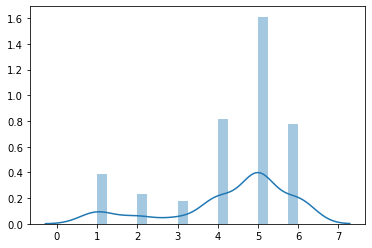

In [8]:
array = [numpy.random.choice(numpy.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2]) for i in range(1,500)]
sns.distplot(array);

Link to my copy of age distribution in Hungary: 
[link](https://onedrive.live.com/edit.aspx?cid=2260bfd62cbf6cee&page=view&resid=2260BFD62CBF6CEE!613&parId=2260BFD62CBF6CEE!103&app=Excel)